# 기본 옵션

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from PIL import Image

import numpy as np
# 기본 옵션들
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import matplotlib.font_manager as fm
mpl.rcParams['font.family'] ='NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

set_matplotlib_formats('retina')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 전체 데이터셋 구성
- 4568개

In [2]:
YN=pd.read_csv('@crawling_data/YN.csv',encoding='utf-8-sig')
SW=pd.read_csv('@crawling_data/SW.csv',encoding='utf-8-sig')
MB=pd.read_csv('@crawling_data/MB.csv',encoding='utf-8-sig')
MR=pd.read_csv('@crawling_data/MR.csv',encoding='utf-8-sig')
SB=pd.read_csv('@crawling_data/SB.csv',encoding='utf-8-sig')
SS=pd.read_csv('@crawling_data/SS.csv',encoding='utf-8-sig')
KC=pd.read_csv('@crawling_data/KC.csv',encoding='utf-8-sig')

In [3]:
df=pd.concat([YN,SW,MB,MR,SB,SS,KC])
df.to_csv('total_youtuber_crawling_data.csv', encoding='utf-8-sig')


In [5]:
df.shape
df.info()
df.columns
df.drop('Unnamed: 0',axis=1,inplace=True)

(4568, 8)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4568 entries, 0 to 503
Data columns (total 8 columns):
Unnamed: 0      4568 non-null int64
youtuber        4568 non-null object
subscribers     4568 non-null object
name            4568 non-null object
upload_date     4568 non-null object
hits            4568 non-null object
likes_num       4568 non-null object
dislikes_num    4568 non-null object
dtypes: int64(1), object(7)
memory usage: 321.2+ KB


Index(['Unnamed: 0', 'youtuber', 'subscribers', 'name', 'upload_date', 'hits',
       'likes_num', 'dislikes_num'],
      dtype='object')

# 데이터 전처리
- youtuber

In [16]:
df.youtuber.unique()
df['youtuber'] = df['youtuber'].apply(lambda x: x.split('-')[0])

array(['취미로 요리하는 남자 Yonam - YouTube', '승우아빠 - YouTube',
       '먹어볼래TryToEat - YouTube', '만개의레시피 10K Recipe - YouTube',
       '심방골주부Korean Food Recipes - YouTube', '소소황 Cook & Eat - YouTube',
       '강쉪 - YouTube'], dtype=object)

- subscribers

In [17]:
df['subscribers'] = df['subscribers'].apply(lambda x: x.split(' ')[1])
df['subscribers'] = df['subscribers'].replace('[\.]', '', regex=True) 
df['subscribers'] = df['subscribers'].replace('[\만명]', '000', regex=True) 
df['subscribers'] = pd.to_numeric(df['subscribers'],downcast='integer')
df['subscribers'] = pd.to_numeric(df['subscribers'], downcast='integer')

- upload_date

In [18]:
df['upload_date'] = df['upload_date'].replace('[\최초 공개:]','',regex=True)
df['upload_date'] = df['upload_date'].replace('[\실시간스트리밍시작일]','',regex=True)
df['upload_date'] = pd.to_datetime(df['upload_date'], errors='coerce') # '4일전' -> NaN으로 우선 처리
df.loc[df['upload_date'].isnull(),:] # 데이터 수집 날짜 - 4일전 = 2020-03.25 로 처리 
df.loc[df['upload_date'].isnull(),'upload_date'] = '2020-03-25'
df['upload_date'] = pd.to_datetime(df['upload_date'], errors='coerce') # 한번 더

,youtuber,subscribers,name,upload_date,hits,likes_num,dislikes_num
0,승우아빠,442000000,51시간동안 바베큐한 등갈비,NaT,"29,770회",1.5천개,14개


- hits

In [19]:
df['hits'] = df['hits'].replace('[\회]','',regex=True)
df['hits'] = df['hits'].replace('[\,]','',regex=True)
df['hits'] = pd.to_numeric(df['hits'], downcast='integer')

- likes

In [20]:
df['likes_num'] = df['likes_num'].replace('[\.]', '', regex=True) 
df['likes_num'] = df['likes_num'].replace('[\천개]','00',regex=True)
df['likes_num'] = df['likes_num'].replace('[\만]','0',regex=True)
df['likes_num'] = pd.to_numeric(df['likes_num'], downcast='integer')

- dislikes

In [21]:
df['dislikes_num'] = df['dislikes_num'].replace('[\개]','',regex=True)
df['dislikes_num'] = df['dislikes_num'].replace('[\천]','00', regex=True)
df['dislikes_num'] = df['dislikes_num'].replace('[\.]','', regex=True)
df['dislikes_num'] = pd.to_numeric(df['dislikes_num'], downcast='integer')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4568 entries, 0 to 503
Data columns (total 7 columns):
youtuber        4568 non-null object
subscribers     4568 non-null int32
name            4568 non-null object
upload_date     4568 non-null datetime64[ns]
hits            4568 non-null int32
likes_num       4568 non-null int32
dislikes_num    4568 non-null int16
dtypes: datetime64[ns](1), int16(1), int32(3), object(2)
memory usage: 205.2+ KB


- upload_date 

In [23]:
import datetime
now = datetime.datetime.now()

In [24]:
df['upload_date'] = df['upload_date'].apply(lambda x : x - datetime.datetime.now())

In [25]:
df['days_after_upload'] = df['upload_date'].apply(lambda x: x.days * -1)

In [26]:
df.head()

,youtuber,subscribers,name,upload_date,hits,likes_num,dislikes_num,days_after_upload
0,취미로 요리하는 남자 Yonam,556000000,요리사들이 한 자리에 모이면 벌어지는 일 2 (오리다리콩피),-12 days +20:42:39.177023,245137,580000,67,12
1,취미로 요리하는 남자 Yonam,556000000,sub)요리하는 남자의 간단한 집들이음식,-33 days +20:42:39.177023,630196,950000,124,33
2,취미로 요리하는 남자 Yonam,556000000,(종료)제가 여러분께 요리를 해드립니다.,-46 days +20:42:39.177023,160997,340000,21,46
3,취미로 요리하는 남자 Yonam,556000000,sub)요리사들이 한 자리에 모이면 벌어지는 일.,-62 days +20:42:39.177023,1962881,21000,384,62
4,취미로 요리하는 남자 Yonam,556000000,sub)요리하는 남자들의 흔한 파티음식.,-74 days +20:42:39.177023,720225,90000,144,74


In [27]:
df['youtuber_id'] = df['youtuber'].factorize()[0]

In [31]:
df[['youtuber_id','name','subscribers','days_after_upload','likes_num','dislikes_num','hits']].sample(15, random_state= 3)

,youtuber_id,name,subscribers,days_after_upload,likes_num,dislikes_num,hits
475,6,강슆:) 카레 요리 / 얼큰 ~ 칼칼! 고구마 카레 만들기 = Sweet pot...,195000000,887,400,0,86
1701,3,그냥 콘치즈가 아니야! 소시지콘치즈 ;) [만개의레시피],356000000,404,9200,1,57491
289,6,"쉽고 간단한 ,느타리버섯 볶음 만드는법~ 담백하고, 풍부하게~ [강쉪]",195000000,600,210000,125,182960
787,3,SUB) 흑임자소스와 연두부의 만남~! 연두부샐러드 :Soft Soybean Cur...,356000000,229,3400,1,1971
3,6,계란으로 할수있는 간단하고 맛있는 3가지 요리~ 3 kinds of egg cook...,195000000,18,30000,86,262820
294,6,"건새우 마늘볶음 만들기~ 마늘향이 솔솔~, 짭쪼롬하게, 맛있게~ [강쉪]",195000000,606,13500,7,10432
354,6,부추김치 담그는 법~ 쉽고 간단하고 맛있게 ~[강슆],195000000,703,58100,34,93110
912,3,🔥영양 만점 #생선조림 부터 #국물반찬까지 #오늘의식단 🔥 [만개의레시피],356000000,254,5300,1,3233
188,1,냉동 만두계를 평정하러 나타난 그 제품 리뷰,442000000,294,180000,43,113564
139,5,지금 부산에서 가장 핫한 뉴웨이브 컨셉의 분식 맛집,127000000,255,3200,3,2311


- 한번 저장해두기

In [17]:
df.to_csv('@preprocessed_youtube_data.csv', encoding='utf-8-sig')

# name(동영상 제목) text 전처리
- 바로 형태소/품사 처리로도 가능하지만, 미리 불용어 및 특수문자 제거 후 해봄

In [18]:
import konlpy
from konlpy.tag import Okt
import re

In [19]:
okt = Okt()

In [20]:
df['clean_name'] = df['name']
df.head()

,youtuber,subscribers,name,upload_date,hits,likes_num,dislikes_num,days_after_upload,youtuber_id,clean_name
0,취미로 요리하는 남자 Yonam,556000000,요리사들이 한 자리에 모이면 벌어지는 일 2 (오리다리콩피),-9 days +07:27:27.585545,245137,580000,67,9,0,요리사들이 한 자리에 모이면 벌어지는 일 2 (오리다리콩피)
1,취미로 요리하는 남자 Yonam,556000000,sub)요리하는 남자의 간단한 집들이음식,-30 days +07:27:27.585545,630196,950000,124,30,0,sub)요리하는 남자의 간단한 집들이음식
2,취미로 요리하는 남자 Yonam,556000000,(종료)제가 여러분께 요리를 해드립니다.,-43 days +07:27:27.585545,160997,340000,21,43,0,(종료)제가 여러분께 요리를 해드립니다.
3,취미로 요리하는 남자 Yonam,556000000,sub)요리사들이 한 자리에 모이면 벌어지는 일.,-59 days +07:27:27.585545,1962881,21000,384,59,0,sub)요리사들이 한 자리에 모이면 벌어지는 일.
4,취미로 요리하는 남자 Yonam,556000000,sub)요리하는 남자들의 흔한 파티음식.,-71 days +07:27:27.585545,720225,90000,144,71,0,sub)요리하는 남자들의 흔한 파티음식.


### 불용어 처리 또는 특수문자 제거


- 1차 제거

In [21]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

#분석에 어긋나는 불용어구 제외 (특수문자, 의성어)
han = re.compile(r'[ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')

clean_name_lst=[]
for i in range(len(df)):
    a = re.sub(emoji_pattern,'',df['clean_name'].iloc[i])
    
    b = re.sub(han,'',a)
    
    clean_name_lst.append(b)
    
df['clean_name']=clean_name_lst

In [44]:
df['clean_name'].tail(20)

484            늙다 호박 맛 풍부하다 엄마 키우다 늙다 호박 스프 pumpkin soup
485                  파스타 얼큰하다 깔끔하다 파스타 아라비아 따다 Arrabiata
486             스프 영혼 위로 치킨 야채 스프 chicken vegetable soup
487    치킨 후라이드 치킨 단호박 매다 그리고 과일 살사 Fried drumstick fr...
488                스테이크 레드와인 소스 오다 치킨 스테이크 chicken steak
489     피자 매콤 한 치킨 프라이드 피자 만들다 법 Hot chili chicken pizza
490                국수 시원하다 구수하다 된장 국수 만들다 법 miso noodles
491                                    초밥 정성 가득 계란 초밥 ^^
492                            파스타 고소하다 폭탄 들깨 크림 수제비 파스타
493                            꽃게 무치다 밥 한 그릇 뚝딱 양념 게장 ^^
494          불고기 가족 위 한 대파 많다 소 불고기 황금 leek beef bulgogi
495         황태 헉 소 리나 황태 불고기 만들다 법 dried pollack bulgogi
496                                 황태 먹다 보고 싶다 황태 짜조 ^^
497    스프 따뜻하다 감자 대파 스프 만들다 법 \ Potato leek soup kang...
498                             호박 구수하다 조선 호박 건 새우 조림 찌개
499       나물 무치다 깻잎 순 나물 가지 맛 동시 무치다 만들다 법 간장 쌈장 고추장 콜라보
500        깻잎 밥 도둑 짜지다 않다 간장 깻잎 장아찌 오다 깻잎 들깨 나물 만들다 법 ^^
501                        깻잎 밥

- 2차 제거
- 요리, 요리사, 여러분 … 의미 없는건 빼기.

In [23]:
my_stopwords_for_wc = ['ㄴㄴ','.',')','(','를','을','에','도','ㅋ','SUB','sub','가','과','의','이다','는','★','♥','Eng','ENG','Sub','♡','요리','요리사','여러분',\
                '🔥','~!','/','와','이','로','은','으로','하다','에서','만','개','의','레시피','만레','s','%','↗','[',']','심방','골','주부','이렇게',\
                'ㅏ','으아','악','ㄱ','&','l',':','??','랑','…','!','!!','!!!','!!!!','!!!!!','☆','feat','X','x','맛있다','만들기','TV','다',\
               '🍜🍜','🎆🎆','🥤🥤🥤','|','🍜','🎂🎂🎂','#','inin','ㅁ','👍👍','CC','🍓🍓🍓','🌲🌲🌲','with','🍓🍓','aHHHH','♥♥♥','@_','@','@@@',\
                'ㅜㅜ','으스스', '스','강쉪','강슆','!^^','!!^^''^^','DongPo','🔥🔥','☕','😍😍😍😍','🍴','😍😍😍','😥😥','◑◑','♥♥♥♥♥♥','!!!!!!','😜😜😜', 'ง', '•̀', '_', '•́ง','👍']

In [24]:
clean_word = [] 
for i in df['clean_name']:
    
    review_text = re.sub("[12?~3.,()''->\n]", '', i)
    word_text = okt.morphs(review_text, stem=True)

    if True: word_text = [token for token in word_text if not token in my_stopwords_for_wc]
        
    clean_word.append(' '.join(word_text))
    
df['clean_name'] = clean_word

###  형태소, 품사 처리
- 39946 형태소로 분리됨

In [25]:
pd.DataFrame(okt.pos(df['clean_name'].values.tolist()[3]))
pd.DataFrame(okt.pos(df['clean_name'].values.tolist()[4501]))

,0,1
0,들,Verb
1,자리,Noun
2,모이,Noun
3,면,Noun
4,벌어지다,Verb
5,일,Noun


,0,1
0,보쌈,Noun
1,삼겹살,Noun
2,수육,Noun
3,굴,Noun
4,무생채,Noun
5,황금,Noun
6,Pork,Alpha
7,wraps,Alpha
8,oyster,Alpha
9,kimchi,Alpha


In [26]:
df_pos = pd.DataFrame()
for i in range(0, len(df['clean_name'])) :
    dfn =  pd.DataFrame(okt.pos(df['clean_name'].values.tolist()[i]))
    df_pos = pd.concat([df_pos, dfn])
    
df_pos = df_pos.rename(columns={0:'형태소',1:'품사'})

In [46]:
df_pos.head(10)

,형태소,품사
0,들,Verb
1,자리,Noun
2,모이,Noun
3,면,Noun
4,벌어지다,Verb
5,일,Noun
6,오리,Noun
7,다리,Noun
8,콩피,Noun
0,남자,Noun


In [28]:
df_pos['품사'].value_counts()

Noun           26160
Verb            4033
Alpha           3463
Adjective       2119
Josa             822
Adverb           506
Exclamation      155
Modifier          80
Suffix            41
Foreign           39
Punctuation       25
Conjunction       12
Eomi              10
Determiner         4
VerbPrefix         3
PreEomi            1
Name: 품사, dtype: int64

In [29]:
freq = pd.Series(' '.join(df_pos['형태소']).split()).value_counts()
freq.head(10)
freq.tail(10)

법       647
만들다     584
다       427
한       342
가지      340
먹다      258
간단하다    247
볶음      242
밥       224
맛       206
dtype: int64

부라자     1
소갈비     1
어벤져스    1
케어      1
아줌마     1
예술인     1
에그인헬    1
전과      1
명품      1
몽블랑     1
dtype: int64

# name(동영상 제목) -> Word Cloud -> 인기 컨텐츠 찾아보기
- Noun              26708  
Alpha              3603  
Adjective          2722  
Adverb             1090  

In [30]:
from wordcloud import WordCloud, STOPWORDS

- 품사가 명사인 것들만

In [47]:
cond1 = (df_pos['품사']=='Noun')
df_N = df_pos.loc[cond1]
df_N.shape
df_N

(26160, 2)

,형태소,품사
1,자리,Noun
2,모이,Noun
3,면,Noun
5,일,Noun
6,오리,Noun
7,다리,Noun
8,콩피,Noun
0,남자,Noun
2,집들이,Noun
3,음식,Noun


In [32]:
wc_N = WordCloud(stopwords=STOPWORDS, background_color='white', width=900, height=600,font_path='@needs_for_you/Malgun.ttf',max_words=100, max_font_size=150).generate(' '.join(df_N['형태소']))

<Figure size 936x504 with 0 Axes>

Text(0.5, 1.0, '요리 분야 컨텐츠 키워드 Top 100')

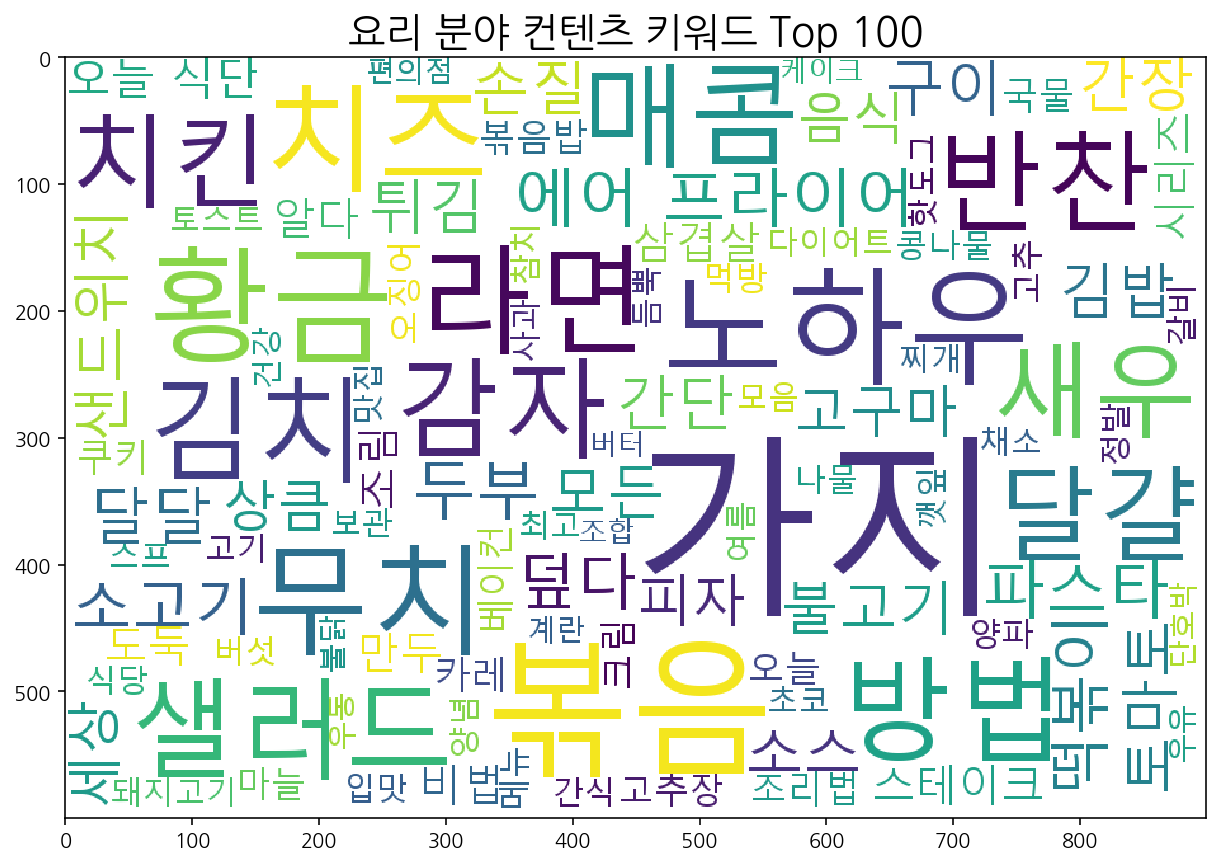

In [33]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina') # 글씨 진하게 보이게 하는거

plt.figure(figsize=[13,7])
plt.title('요리 분야 컨텐츠 키워드 Top 100',size=20)
plt.imshow(wc_N)
plt.show()

- 품사에서 alpha인것들만 활용 (영어단어)

In [34]:
cond2 = (df_pos['품사']=='Alpha')
df_A = df_pos.loc[cond2]
df_A.shape
df_A

(3463, 2)

,형태소,품사
3,QnA,Alpha
15,water,Alpha
16,agingwet,Alpha
17,aged,Alpha
18,steakyonam,Alpha
8,sous,Alpha
9,Vide,Alpha
10,beef,Alpha
11,cutlet,Alpha
12,film,Alpha


In [35]:
wc_A = WordCloud(stopwords=STOPWORDS, background_color='white', width=900, height=600,font_path='@needs_for_you/Malgun.ttf',max_words=100, max_font_size=120).generate(' '.join(df_A['형태소']))

<Figure size 936x504 with 0 Axes>

Text(0.5, 1.0, '요리 분야 컨텐츠 영어 키워드 Top 100')

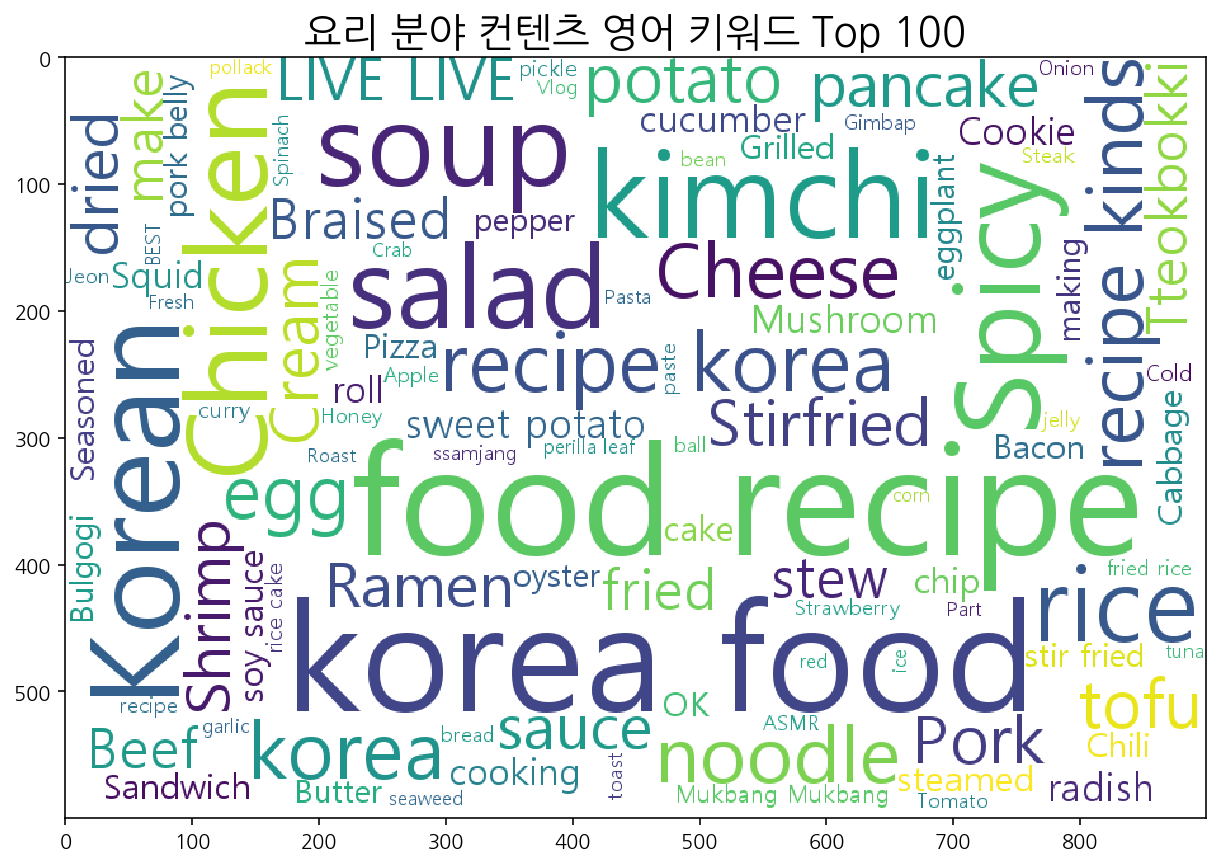

In [36]:
plt.figure(figsize=[13,7])
plt.title('요리 분야 컨텐츠 영어 키워드 Top 100',size=20)
plt.imshow(wc_A)
plt.show()

- 품사에서 형용사인것들만 활용

In [37]:
cond3 = (df_pos['품사']=='Adjective')
df_AD = df_pos.loc[cond3]
df_AD.shape
df_AD

(2119, 2)

,형태소,품사
1,간단하다,Adjective
2,흔하다,Adjective
1,간단하다,Adjective
9,아니다,Adjective
4,간단하다,Adjective
3,흔하다,Adjective
1,간단하다,Adjective
2,안되다,Adjective
1,간단하다,Adjective
1,간단하다,Adjective


<Figure size 936x504 with 0 Axes>

Text(0.5, 1.0, '요리 동영상 핵심 표현 키워드 Top 100')

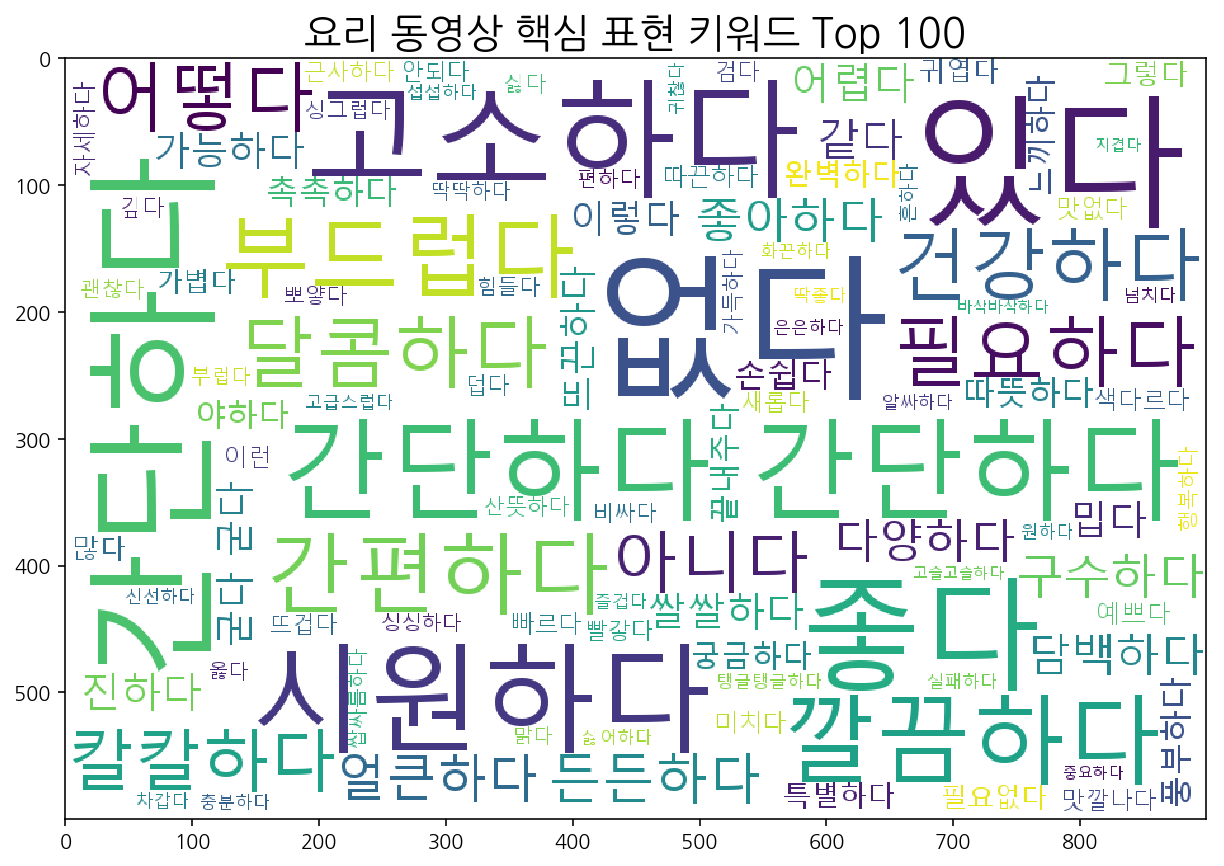

In [38]:
wc_AD = WordCloud(stopwords=STOPWORDS, background_color='white', width=900, height=600,font_path='@needs_for_you/Malgun.ttf',max_words=100, max_font_size=120).generate(' '.join(df_AD['형태소']))

plt.figure(figsize=[13,7])
plt.title('요리 동영상 핵심 표현 키워드 Top 100',size=20)
plt.imshow(wc_AD)
plt.show()

- 품사가 adverb인것만

In [39]:
cond4 = (df_pos['품사']=='Adverb')
df_ADV = df_pos.loc[cond4]
df_ADV.shape

(506, 2)

<Figure size 936x504 with 0 Axes>

Text(0.5, 1.0, '요리와 함께 활용 가능한 키워드 Top 100')

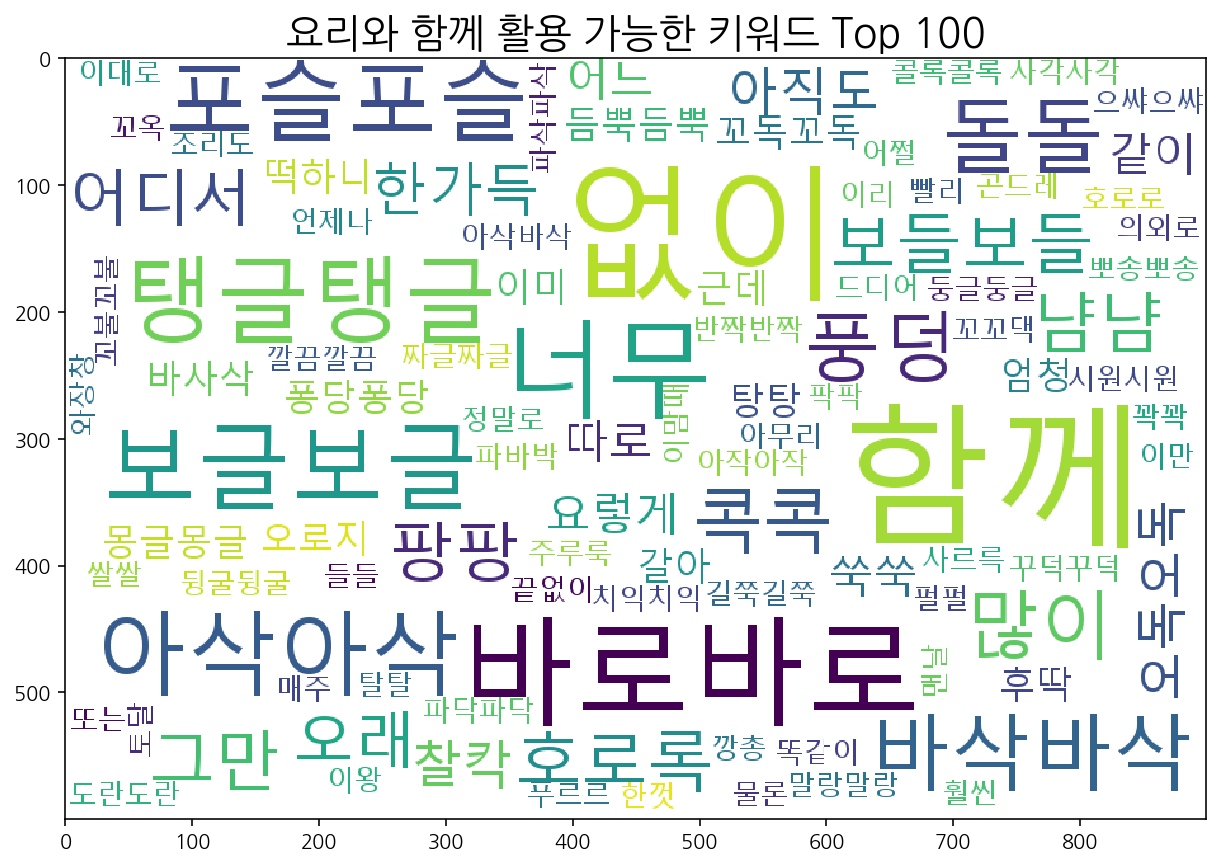

In [40]:
wc_ADV = WordCloud(stopwords=STOPWORDS, background_color='white', width=900, height=600,font_path='@needs_for_you/Malgun.ttf',max_words=100, max_font_size=120).generate(' '.join(df_ADV['형태소']))
plt.figure(figsize=[13,7])
plt.title('요리와 함께 활용 가능한 키워드 Top 100',size=20)
plt.imshow(wc_ADV)
plt.show()